연습 자료 : https://jehyunlee.github.io/2020/10/25/Python-DS-40-googletrend/

In [1]:
# Neptune 연습
import neptune
from neptunecontrib.api import log_chart

In [2]:
neptune.init(api_token = 'eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vdWkubmVwdHVuZS5haSIsImFwaV91cmwiOiJodHRwczovL3VpLm5lcHR1bmUuYWkiLCJhcGlfa2V5IjoiZWYyZDQyOTItODQyMy00NzM0LWEzNGEtZTU3MTJjMTQyYTkyIn0=',
            project_qualified_name='jaedoo/Practice') # username, 프로젝트명

Project(jaedoo/Practice)

In [4]:
neptune.create_experiment(name = "Practice")

https://ui.neptune.ai/jaedoo/Practice/e/PRAC-6


Experiment(PRAC-6)

In [20]:
neptune.log_image('plot1',fig3)

In [21]:
neptune.log_image('plot2',fig1)
neptune.log_image('plot3',fig2)

In [22]:
# Neptune상에 Artifact상에 띄워진다.
log_chart(name = 'Plot1',chart = fig1)
log_chart(name = 'Plot2',chart = fig2)
log_chart(name = 'Plot3',chart = fig3)

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

import matplotlib.font_manager as fm
path = 'C:\Windows\Fonts\malgunbd.ttf'
font_name = fm.FontProperties(fname=path).get_name()
plt.rc('font', family=font_name)

In [8]:
path = 'Data/'

In [9]:
# Google Trends 파일명
files = ['ai_time.csv', 'bigdata_time.csv', 'da_time.csv', 'de_time.csv', 'di_time.csv', 'ds_time.csv']
nfiles = len(files)

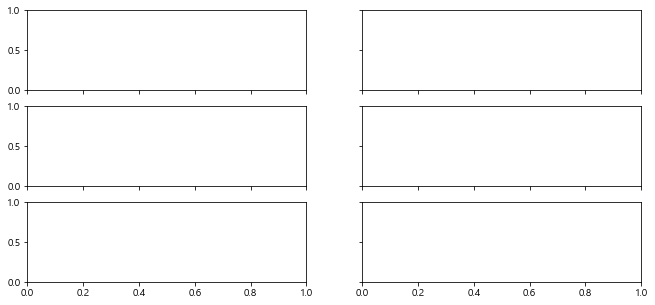

In [10]:
# 시각화
fig, axes = plt.subplots(ncols= 2, nrows = 3, figsize = (11,5),sharex = True, sharey = True)
axs = axes.ravel()

In [11]:
axs

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000F14FA45108>,
      dtype=object)

In [ ]:
A = pd.read_csv(os.path.join(path,file),skiprows = 2)
list_columns = list(A.columns)
list_columns[0] = 'Month'
A.columns = list_columns

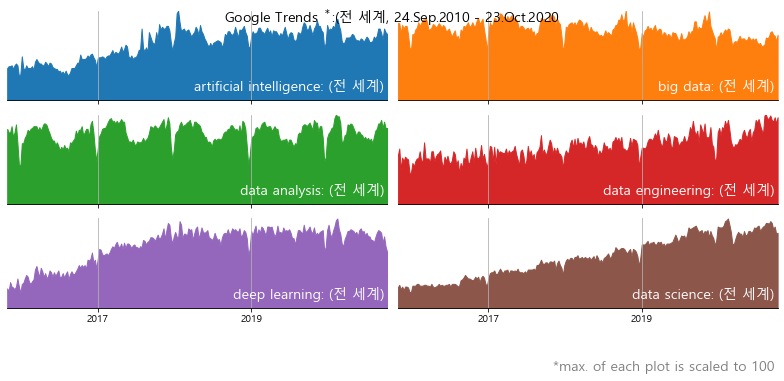

In [13]:
# 시각화
fig1, axes = plt.subplots(ncols= 2, nrows = 3, figsize = (11,5),sharex = True, sharey = True)
axs = axes.ravel()

dfs = {}
for i ,(ax,file) in enumerate(zip(axs,files)):
    dfs[file] = pd.read_csv(os.path.join(path,file),skiprows = 2)
    
    
    list_temp = list(dfs[file].columns)
    list_temp[0] = 'Month'
    dfs[file].columns = list_temp
    dfs[file]['year'] = dfs[file]['Month'].apply(lambda s : s.split('-')[0])
    
    
    
    cols = dfs[file].columns
    # print(cols)
    
    cols_clear = cols[1].split(".")[0]
    # print(cols_clear)
    
    
    dfs[file].rename(columns = {cols[1] : cols_clear},inplace = True)
    region = cols[1].split(':')[1][1:-1]
                                   
    df_idx = dfs[file].reset_index().groupby('year').nth(0)['index'].values
    # print(df_idx)
    
    # print("dfs 크기 설명: ", dfs[file].shape)
    
    
    # fill_between() : 라인 차트에서 라인 사이를 특정한 색으로 채우고 싶을 때 사용
    # 파라미터 : x, y, data, color + where(조건 명시)
    ax.fill_between(dfs[file].index,0,dfs[file][cols_clear], color = f"C{i}")
    
    
    # ax.annote : 그래프에 글자를 명시하는 기능
    # 파라미터 : text, (x,y)위치, ha(x축 선상), color = 색깔, fontsize = 폰트 크기
    ax.annotate(cols_clear, (dfs[file].shape[0] -3, 10), ha ='right',color = 'w',fontsize =14)
    
    
    # 그래프 그릴 때 네모난 박스 형태 안에 그래프가 표현됨. 그때 위쪽, 좌우 선만 없애고 싶을 때 아래 코드 사용
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # x,y축 표현 범위 설정
    ax.set_xlim(0,dfs[file].shape[0]-1)
    ax.set_ylim(0,100)
    ax.set_yticks([])
    ax.grid()
    
    if i > 3:
        ax.set_xticks(df_idx[::2][1:])
        ax.set_xticklabels(dfs[file]['year'].loc[df_idx].values[::2][1:])

        
# print("dfs 설명 : ",dfs )
axs[5].text(dfs[file].shape[0]-3,-70,'*max. of each plot is scaled to 100', ha = 'right', c = 'gray', fontsize = 14)
fig1.suptitle("Google Trends $^*$:" + f"{region}, 24.Sep.2010 - 23.Oct.2020",fontsize = 14)
fig1.tight_layout(rect=[0,-0.05, 1, 1])

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:66: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


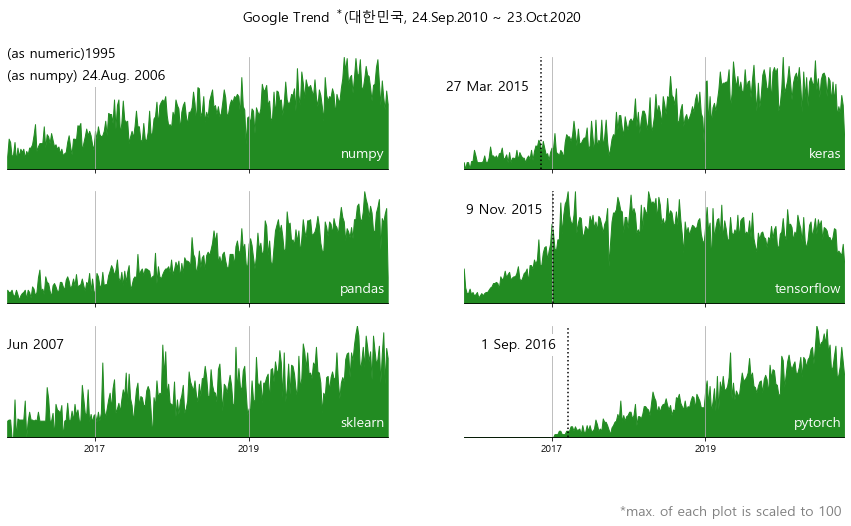

In [15]:
libs_time = ['numpy.csv','keras.csv','pandas.csv','tensorflow.csv','sklearn.csv','pytorch.csv']
nfiles = len(libs_time)
fig2,axes = plt.subplots(ncols = 2, nrows = 3, figsize = (11,5),
                       sharex = True, sharey = True)
axs = axes.ravel()

dfs = {}
for i, (ax,file) in enumerate(zip(axs,libs_time)):
    dfs[file] = pd.read_csv(os.path.join(path,file),skiprows = 2, na_values = "<1")
    list_temp = list(dfs[file].columns)
    list_temp[0] = 'Month'
    dfs[file].columns = list_temp
    dfs[file]['year'] = dfs[file]['Month'].apply(lambda s : s.split('-')[0])
    cols = dfs[file].columns
    cols_clear = cols[1].split(':')[0]
    dfs[file].rename(columns = {cols[1]:cols_clear},inplace = True)
    
    
    
    region = cols[1].split(':')[1][1:-1]
    
    # print(dfs[file].reset_index().groupby('year').nth(0))
    df_idx = dfs[file].reset_index().groupby('year').nth(0)['index'].values
    
    # print(df_idx)
    ax.fill_between(dfs[file].index, 0 ,dfs[file][cols_clear],color = 'forestgreen')
    ax.annotate(cols_clear,(dfs[file].shape[0] - 3,10), ha ='right', color = 'w',fontsize = 14)
    
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    ax.set_xlim(0,dfs[file].shape[0]-1)
    ax.set_ylim(0,100)
    ax.set_yticks([])
    ax.grid()
    
    if i > 3:
        ax.set_xticks(df_idx[::2][1:])
        ax.set_xticklabels(dfs[file]['year'].loc[df_idx].values[::2][1:])

        
        
        
        
axs[0].annotate("(as numeric)1995", (0,100),ha = 'left', fontsize = 14,backgroundcolor= 'w')
axs[0].annotate("(as numpy) 24.Aug. 2006 ", (0,80),ha= 'left',fontsize = 14,backgroundcolor = 'w')

axs[1].axvline(53,c = 'k',linestyle = ":") # c = "k" : BLack
axs[1].annotate("27 Mar. 2015 ", (51-3,70),ha= 'right', fontsize = 14, backgroundcolor = 'w')

#axs[2].annotate("11 Jan. 2008", (0.80), ha= 'left', fontsize = 14, backgroundcolor = 'w')

axs[3].axvline(61, c = 'k',linestyle = ':')
axs[3].annotate("9 Nov. 2015 ", (60-3, 80),ha = 'right',fontsize = 14,backgroundcolor = 'w')

axs[4].annotate('Jun 2007', (0,80),ha = 'left',fontsize = 14,backgroundcolor = 'w')

axs[5].axvline(71,c = 'k',linestyle = ':')
axs[5].annotate('1 Sep. 2016 ', (69-3 , 80), ha = 'right',fontsize = 14,backgroundcolor = 'w')

axs[5].text(dfs[file].shape[0]-3,-70,"*max. of each plot is scaled to 100",
           ha  = 'right', c = 'gray', fontsize = 14)
fig2.suptitle("Google Trend $^*$" + f"{region}, 24.Sep.2010 ~ 23.Oct.2020",fontsize = 14)
# rect : Tuple ~>> left, bottom, right, top
fig2.tight_layout(rect= [2,-0.05,2,2])
fig2.set_size_inches(15,7)

### 라이브러리별로 어느 나라에서 많이 찾았는지 보겠습니다.

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:47: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


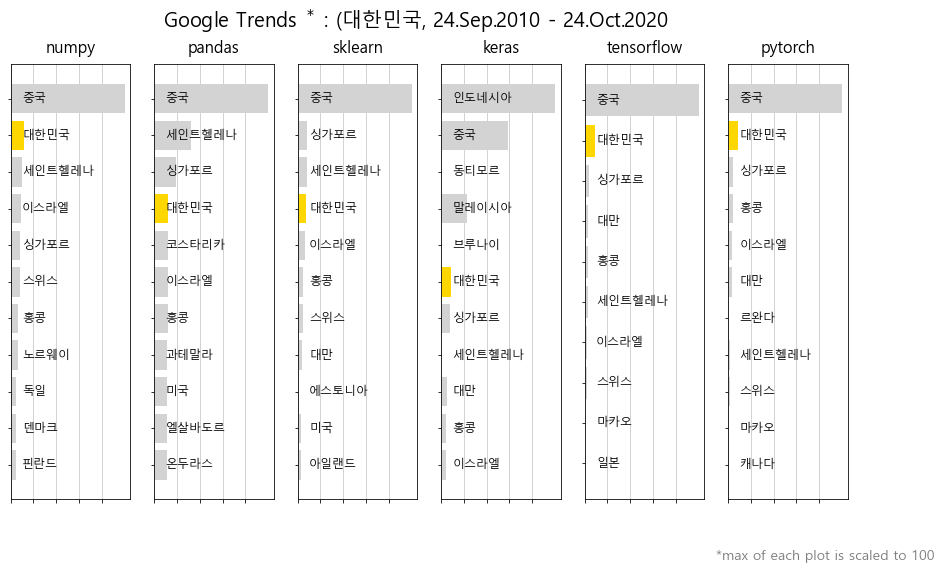

In [16]:
fig3, axs = plt.subplots(ncols = 6, figsize = (15,8))

libs_map_ = ['numpy','pandas','sklearn','keras','tensorflow','pytorch']


for ax, l in zip(axs,libs_map_):
    lib = l.split('_')[0]
    # print(lib, "", l)
    Data = pd.read_csv(os.path.join(path,l+'_map.csv'),skiprows = 2,na_values = "<1")
    list_col = Data.columns
    name = list_col[1].split(':')[0]
    # print(list_col)
    #cols_clear = list_col[]
    Data.rename(columns = {list_col[1] : name},inplace = True)
    # print(Data)
    shares = Data.loc[:10,lib]
    
    # print(shares)
    
    countries = Data.loc[:10,'국가']
    
    ax.barh(countries,shares,fc = 'lightgray')
    ax.set_yticklabels([]) # y축 값 없앰
    ax.invert_yaxis()
    ax.set_xticks(list(range(0,100,20)))
    ax.set_xticklabels([]) # x축 값 없앰
    ax.grid(axis = 'x',c = 'lightgray',lw = 1,alpha = 1)
    
    if l == 'skearn':
        title = 'scikit-learn'
    else:
        title = l
        
    ax.set_title(title,fontsize =16,pad =12) # pad ; 그래프 와 title간의 거리
    
    idx_korea = np.where('대한민국' == countries.values)[0]
    # print(np.where('대한민국' == countries.values))
    
    if len(idx_korea) > 0:
        ax.patches[idx_korea[0]].set_facecolor('gold')
        
    for i, country in enumerate(countries):
        ax.annotate(country,(10,i),va = 'center',fontsize = 12)

fig3.text(0.98, 0.02, '*max of each plot is scaled to 100',ha = 'right',c = 'gray', fontsize = 14)
fig3.suptitle("Google Trends $^*$ : " + f"{region}, 24.Sep.2010 - 24.Oct.2020",fontsize = 20)
fig3.tight_layout(rect = [1,-0.05,1,1])